# Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
# import minmax
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Memuat dan memproses data
data = pd.read_csv('https://raw.githubusercontent.com/DwiAnggaraNS/AI-MelangkahDariTengah-2024/main/Airline_Qatar_Reviews.csv')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data[['Date', 'Rating']]
data.dropna(subset=['Date'], inplace=True)
data.set_index('Date', inplace=True)

## Make Dataset into Year-Month Format

In [ ]:
# Menghitung jumlah rating per bulan sebelum resampling
monthly_counts = data.resample('M').count()

# Resampling data per bulan untuk mean rating
df_monthly = data.resample('M').mean()

df_monthly.sort_index(inplace=True)

# Mengisi missing values
df_monthly['Rating'] = df_monthly['Rating'].interpolate(method='linear')

<ipython-input-3-bbc43e908df0>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = data.resample('M').count()
<ipython-input-3-bbc43e908df0>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = data.resample('M').mean()


# Exploratory Data Analysis (EDA)

## Visualize Temporal Trend of Average Monthly Rating

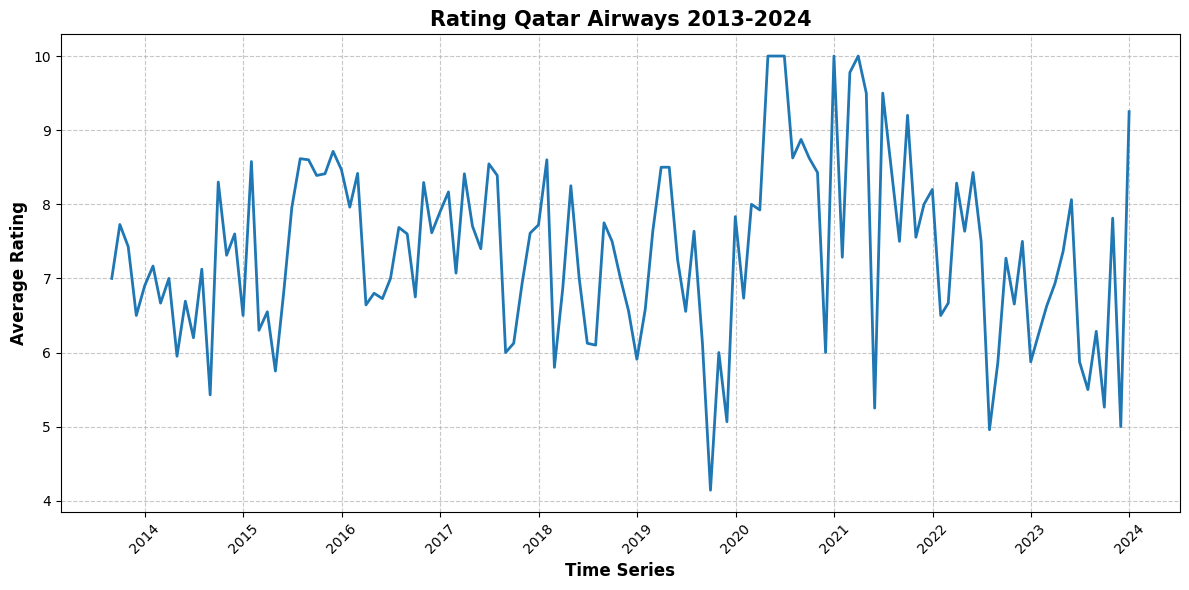


Statistik Deskriptif Rating Bulanan:
count    128.000000
mean       7.300860
std        1.336584
min        1.000000
25%        6.537500
50%        7.381818
75%        8.287815
max       10.000000
Name: Rating, dtype: float64

Jumlah Data Rating per Bulan:

Format: Tahun-Bulan : Jumlah Rating
----------------------------------------
2013-08 : 7 rating
2013-09 : 11 rating
2013-10 : 14 rating
2013-11 : 6 rating
2013-12 : 10 rating
2014-01 : 24 rating
2014-02 : 9 rating
2014-03 : 15 rating
2014-04 : 20 rating
2014-05 : 13 rating
2014-06 : 10 rating
2014-07 : 8 rating
2014-08 : 7 rating
2014-09 : 10 rating
2014-10 : 16 rating
2014-11 : 10 rating
2014-12 : 14 rating
2015-01 : 26 rating
2015-02 : 10 rating
2015-03 : 20 rating
2015-04 : 12 rating
2015-05 : 11 rating
2015-06 : 24 rating
2015-07 : 13 rating
2015-08 : 20 rating
2015-09 : 18 rating
2015-10 : 17 rating
2015-11 : 21 rating
2015-12 : 15 rating
2016-01 : 26 rating
2016-02 : 12 rating
2016-03 : 14 rating
2016-04 : 15 rating
2016-05 :

In [ ]:
# Menghapus data bulan Maret 2024 jika hanya memiliki satu untuk visualisasi
df_monthly_without_outlier = df_monthly[~((df_monthly.index.year == 2024))]

# Memfilter data sehingga tidak termasuk bulan Maret 2024 untuk modeling
df_monthly_for_modeling = df_monthly[~((df_monthly.index.year == 2024) & (df_monthly.index.month == 3))]

df_monthly_for_modeling_statistic_model = df_monthly[~((df_monthly.index.year == 2024) & (df_monthly.index.month == 3))]

# Sort index
df_monthly_without_outlier.sort_index(inplace=True)
df_monthly_for_modeling.sort_index(inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_without_outlier.index, df_monthly_without_outlier['Rating'], linewidth=2)
plt.title('Rating Qatar Airways 2013-2024', fontsize=15, fontweight='bold')
plt.ylabel('Average Rating', fontsize=12, fontweight='bold')
plt.xlabel('Time Series', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis untuk menampilkan hanya tahun
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotasi label sumbu x
plt.xticks(rotation=45)

# Mengatur margin plot
plt.tight_layout()

plt.show()

# Statistik deskriptif dengan jumlah data per bulan
print("\nStatistik Deskriptif Rating Bulanan:")
stats_df = df_monthly['Rating'].describe()
print(stats_df)

print("\nJumlah Data Rating per Bulan:")
print("\nFormat: Tahun-Bulan : Jumlah Rating")
print("-" * 40)
for date, count in monthly_counts['Rating'].items():
    if count > 0:  # Hanya tampilkan bulan yang memiliki data
        print(f"{date.strftime('%Y-%m')} : {int(count)} rating")

# Menampilkan total data
print("-" * 40)
print(f"Total data: {monthly_counts['Rating'].sum()} rating")


## Visualize Temporal Trend Average Yearly Rating

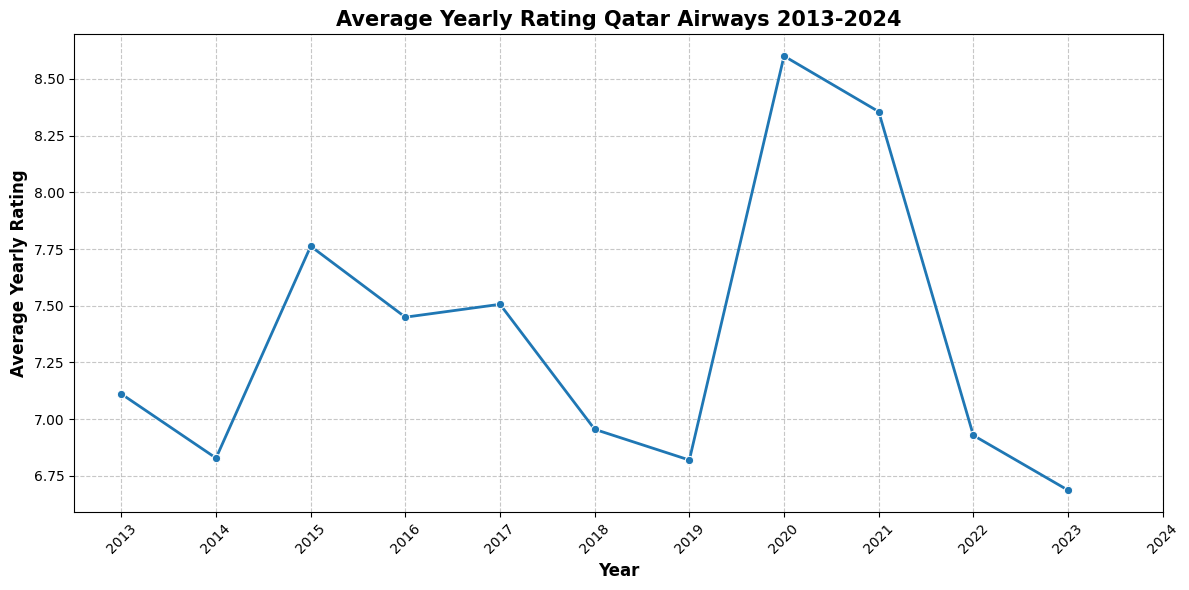

In [ ]:
# Menambahkan kolom tahun untuk memastikan setiap tahun muncul pada sumbu x
df_monthly_without_outlier['Year'] = df_monthly_without_outlier.index.year

# Membuat plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_without_outlier, x="Year", y='Rating', estimator=np.mean, linewidth=2, ci=None, marker='o')  # Tambahkan marker untuk titik tahunan
plt.title('Average Yearly Rating Qatar Airways 2013-2024', fontsize=15, fontweight='bold')
plt.ylabel('Average Yearly Rating', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

# Menetapkan tahun pada sumbu x dari 2013 hingga 2024
plt.xticks(ticks=np.arange(2013, 2025, 1), rotation=45)

# Mengatur margin plot
plt.tight_layout()

plt.show()

## Visualize Boxplot

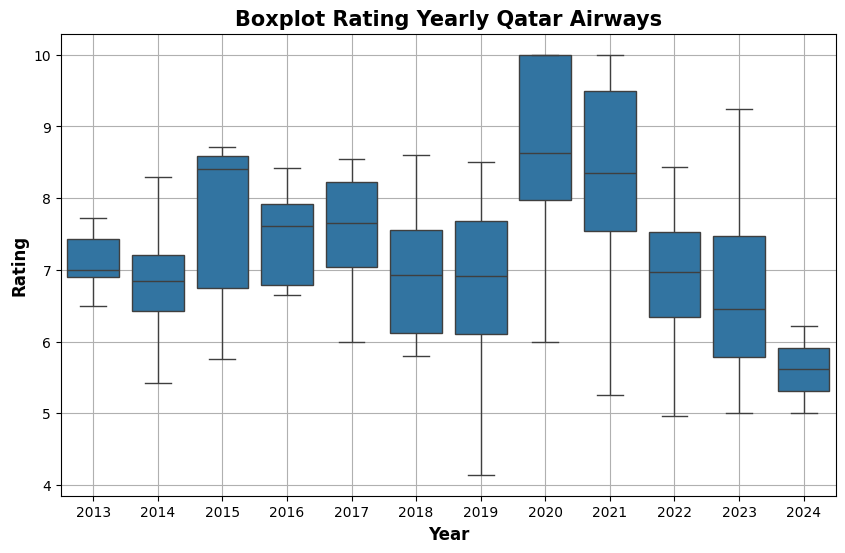

In [ ]:
# Boxplot Rating per Tahun Qatar Airways
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_monthly_for_modeling.index.year, y='Rating', data=df_monthly_for_modeling)
plt.title('Boxplot Rating Yearly Qatar Airways', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Rating', fontsize=12, fontweight='bold')
plt.grid(True)

# Modeling

## Using Machine Learning Approach

### Feature Engineering

In [ ]:
df_monthly_for_modeling['rating_t-1'] = df_monthly_for_modeling['Rating'].shift(1)
df_monthly_for_modeling['rating_ma_3'] = df_monthly_for_modeling['Rating'].rolling(window=3).mean()

# drop missing values
df_monthly_for_modeling.dropna(inplace=True)

df_monthly_for_modeling.head()

<ipython-input-5-afe575dfb65d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly_for_modeling['rating_t-1'] = df_monthly_for_modeling['Rating'].shift(1)
<ipython-input-5-afe575dfb65d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly_for_modeling['rating_ma_3'] = df_monthly_for_modeling['Rating'].rolling(window=3).mean()
<ipython-input-5-afe575dfb65d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

,Rating,rating_t-1,rating_ma_3
Date,,,
2013-10-31,7.428571,7.727273,7.385281
2013-11-30,6.500000,7.428571,7.218615
2013-12-31,6.900000,6.500000,6.942857
2014-01-31,7.166667,6.900000,6.855556
2014-02-28,6.666667,7.166667,6.911111


In [ ]:
# Fungsi untuk mengekstrak fitur-fitur dari kolom 'time'
def convert_time(df):
    # Ekstraksi fitur-fitur yang relevan
    df['year'] = df.index.year
    df['month'] = df.index.month

# Terapkan fungsi konversi pada dataset
convert_time(df_monthly_for_modeling)

# Menampilkan hasil
print(df_monthly_for_modeling.head())

              Rating  rating_t-1  rating_ma_3  year  month
Date                                                      
2013-10-31  7.428571    7.727273     7.385281  2013     10
2013-11-30  6.500000    7.428571     7.218615  2013     11
2013-12-31  6.900000    6.500000     6.942857  2013     12
2014-01-31  7.166667    6.900000     6.855556  2014      1
2014-02-28  6.666667    7.166667     6.911111  2014      2


<ipython-input-6-d0021859582a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
<ipython-input-6-d0021859582a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


### Train-Test Split

In [ ]:
train_size = int(len(df_monthly_for_modeling) * 0.8)

# Split data berdasarkan time untuk machine learning
train_df = df_monthly_for_modeling.iloc[:train_size].copy()
test_df = df_monthly_for_modeling.iloc[train_size:].copy()

# Split data berdasarkan time untuk statistic model
train_df_statistic_model = df_monthly_for_modeling_statistic_model.iloc[:train_size].copy()
test_df_statistic_model = df_monthly_for_modeling_statistic_model.iloc[train_size:].copy()

print(f"Jumlah data train: {len(train_df)}")
print(f"Jumlah data test: {len(test_df)}")

print()

print(f"Jumlah data train statistic model: {len(train_df_statistic_model)}")
print(f"Jumlah data test statistic model: {len(test_df_statistic_model)}")

Jumlah data train: 100
Jumlah data test: 25

Jumlah data train statistic model: 100
Jumlah data test statistic model: 27


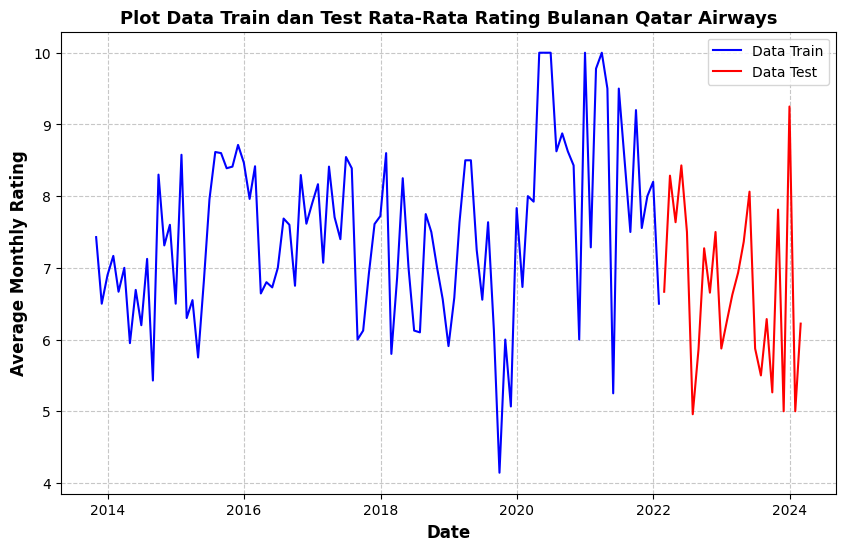

In [ ]:
import matplotlib.pyplot as plt

# Plot Time Series Data Train dan Test untuk Rata-Rata Rating Bulanan
plt.figure(figsize=(10, 6))
plt.plot(train_df.index, train_df['Rating'], label='Data Train', color='blue')
plt.plot(test_df.index, test_df['Rating'], label='Data Test', color='red')
plt.legend()
plt.title('Plot Data Train dan Test Rata-Rata Rating Bulanan Qatar Airways', fontsize=13, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Average Monthly Rating', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Ensure X_train and y_train have the same number of samples
X_train = train_df.drop(columns=['Rating'])  # Fitur (tanpa kolom target)
y_train = train_df['Rating']  # Kolom target

X_test = test_df.drop(columns=['Rating'])  # Fitur (tanpa kolom target)
y_test = test_df['Rating']  # Kolom target

# Align X_train and y_train
X_train, y_train = X_train.align(y_train, join='inner', axis=0)
X_test, y_test = X_test.align(y_test, join='inner', axis=0)

# Ensure X_train and y_train have the same number of samples untuk statistic model
X_train_statistic = train_df_statistic_model.drop(columns=['Rating'])  # Fitur (tanpa kolom target)
y_train_statistic = train_df_statistic_model['Rating']  # Kolom target

X_test_statistic = test_df_statistic_model.drop(columns=['Rating'])  # Fitur (tanpa kolom target)
y_test_statistic = test_df_statistic_model['Rating']  # Kolom target

# Align X_train and y_train
X_train_statistic, y_train_statistic = X_train_statistic.align(y_train, join='inner', axis=0)
X_test_statistic, y_test_statistic = X_test_statistic.align(y_test, join='inner', axis=0)

### Train Models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Define the models with random_state=42
seed = 42
np.random.seed(seed)

# Define models
models = [
    ('model_lr', LinearRegression()),
    ('model_knn', KNeighborsRegressor()),
    ('model_dt', DecisionTreeRegressor(random_state=seed)),
    ('model_svr_rbf', SVR(kernel='rbf')),
    ('model_svr_linear', SVR(kernel='linear')),
    ('model_ridge', Ridge(random_state=seed)),
    ('model_rf', RandomForestRegressor(random_state=seed)),
    ('model_ada', AdaBoostRegressor(random_state=seed)),
    ('model_gbr', GradientBoostingRegressor(random_state=seed)),
    ('model_et', ExtraTreesRegressor(random_state=seed)),
    ('model_xgb', XGBRegressor(random_state=seed)),
    ('model_lightgbm', LGBMRegressor(random_state=seed)),
    ('model_lasso', Lasso(random_state=seed)),
    ('model_en', ElasticNet(random_state=seed)),
    ('model_kernel', KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5))
]

# Dictionary to store the results and trained models
results_df_imputed_reg = pd.DataFrame(columns=["Model", "Train RMSE Mean", "Test RMSE Mean", "Train R^2", "Test R^2"])
trained_models = {}

# Function to evaluate model performance
def evaluate_metrics(pipeline, X, y):
    y_pred = pipeline.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    return rmse, r2

# Loop through each model
for name, model in models:
    pipeline = Pipeline([
        ('regressor', model)
    ])

    # Train the model on the training set
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline

    # Evaluate RMSE and R^2 on the train and test sets
    rmse_train, r2_train = evaluate_metrics(pipeline, X_train, y_train)
    rmse_test, r2_test = evaluate_metrics(pipeline, X_test, y_test)

    # Append the results to the DataFrame
    results_df_imputed_reg.loc[len(results_df_imputed_reg)] = [name, rmse_train, rmse_test, r2_train, r2_test]

# Display the results
print(results_df_imputed_reg)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 4
[LightGBM] [Info] Start training from score 7.506731
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

### Tune Best Models

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Custom RMSE scorer
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create the RMSE scorer object
rmse = make_scorer(rmse_scorer, greater_is_better=False)

# Define search spaces
lasso_params = {
    'grid': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
        'max_iter': [1000, 2000, 3000],
        'tol': [1e-4, 1e-3, 1e-2],
        'selection': ['cyclic', 'random']
    },
    'random': {
        'alpha': np.logspace(-4, 1, 100),
        'max_iter': np.arange(1000, 3100, 100),
        'tol': np.logspace(-4, -2, 100),
        'selection': ['cyclic', 'random']
    }
}

elasticnet_params = {
    'grid': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'max_iter': [1000, 2000, 3000],
        'tol': [1e-4, 1e-3, 1e-2]
    },
    'random': {
        'alpha': np.logspace(-4, 1, 100),
        'l1_ratio': np.linspace(0.1, 0.9, 100),
        'max_iter': np.arange(1000, 3100, 100),
        'tol': np.logspace(-4, -2, 100)
    }
}

svr_params = {
    'grid': {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.2],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.1, 1],
        'degree': [2, 3, 4]  # Only used with poly kernel
    },
    'random': {
        'C': np.logspace(-1, 2, 100),
        'epsilon': np.linspace(0.01, 0.2, 100),
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'] + list(np.logspace(-1, 0, 50)),
        'degree': [2, 3, 4]
    }
}

def grid_search_tuning_ts(X_train, y_train, X_test, y_test, n_splits=5):
    """
    Perform Grid Search tuning for time series data
    """
    # Initialize TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=n_splits)

    models = {
        'Lasso': (Lasso(), lasso_params['grid']),
        'ElasticNet': (ElasticNet(), elasticnet_params['grid']),
        # 'SVR': (SVR(), svr_params['grid'])
    }

    results = {}

    for name, (model, params) in models.items():
        print(f"\nTuning {name} with Grid Search...")
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=params,
            scoring=rmse,
            cv=tscv,  # Using TimeSeriesSplit
            n_jobs=-1,
            verbose=1,
            return_train_score=True  # Add this parameter
        )

        # Sort index to ensure temporal order is maintained
        if hasattr(X_train, 'index'):
            X_train = X_train.sort_index()
            y_train = y_train.sort_index()

        grid_search.fit(X_train, y_train)

        # Get best model and make predictions
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        test_rmse = rmse_scorer(y_test, y_pred)

        # Calculate mean CV score for each fold
        cv_rmse = np.abs(grid_search.cv_results_['mean_test_score'])

        results[name] = {
            'best_params': grid_search.best_params_,
            'best_score': -grid_search.best_score_,  # Convert minimizing score to positive RMSE
            'test_rmse': test_rmse,
            'cv_rmse': cv_rmse
        }

        print(f"\n{name} Results:")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Average CV RMSE: {-grid_search.best_score_:.4f}")
        print(f"Test RMSE: {test_rmse:.4f}")

    return results

def random_search_tuning_ts(X_train, y_train, X_test, y_test, n_splits=5, n_iter=100):
    """
    Perform Random Search tuning for time series data
    """
    # Initialize TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=n_splits)

    models = {
        'Lasso': (Lasso(), lasso_params['random']),
        'ElasticNet': (ElasticNet(), elasticnet_params['random']),
        # 'SVR': (SVR(), svr_params['random'])
    }

    results = {}

    for name, (model, params) in models.items():
        print(f"\nTuning {name} with Random Search...")
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=params,
            n_iter=n_iter,
            scoring=rmse,
            cv=tscv,  # Using TimeSeriesSplit
            n_jobs=-1,
            verbose=1,
            return_train_score=True  # Add this parameter
        )

        # Sort index to ensure temporal order is maintained
        if hasattr(X_train, 'index'):
            X_train = X_train.sort_index()
            y_train = y_train.sort_index()

        random_search.fit(X_train, y_train)

        # Get best model and make predictions
        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X_test)
        test_rmse = rmse_scorer(y_test, y_pred)

        # Calculate mean CV score for each fold
        cv_rmse = np.abs(random_search.cv_results_['mean_test_score'])

        results[name] = {
            'best_params': random_search.best_params_,
            'best_score': -random_search.best_score_,  # Convert minimizing score to positive RMSE
            'test_rmse': test_rmse,
            'cv_rmse': cv_rmse
        }

        print(f"\n{name} Results:")
        print(f"Best Parameters: {random_search.best_params_}")
        print(f"Average CV RMSE: {-random_search.best_score_:.4f}")
        print(f"Test RMSE: {test_rmse:.4f}")

    return results

# Perform Grid Search tuning with time series CV
grid_results = grid_search_tuning_ts(X_train, y_train, X_test, y_test, n_splits=3)

# Perform Random Search tuning with time series CV
random_results = random_search_tuning_ts(X_train, y_train, X_test, y_test, n_splits=3, n_iter=100)


Tuning Lasso with Grid Search...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Lasso Results:
Best Parameters: {'alpha': 0.01, 'max_iter': 1000, 'selection': 'cyclic', 'tol': 0.01}
Average CV RMSE: 0.7652
Test RMSE: 0.7475

Tuning ElasticNet with Grid Search...
Fitting 3 folds for each of 270 candidates, totalling 810 fits

ElasticNet Results:
Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1000, 'tol': 0.01}
Average CV RMSE: 0.7667
Test RMSE: 0.7476

Tuning Lasso with Random Search...
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Lasso Results:
Best Parameters: {'tol': 0.0003053855508833416, 'selection': 'cyclic', 'max_iter': 1900, 'alpha': 0.029836472402833405}
Average CV RMSE: 0.7558
Test RMSE: 0.7539

Tuning ElasticNet with Random Search...
Fitting 3 folds for each of 100 candidates, totalling 300 fits

ElasticNet Results:
Best Parameters: {'tol': 0.0008497534359086447, 'max_iter': 2800, 'l1_ratio': 0.9, 'alpha': 0.0298364724028334

# Using Statistic Model

In [ ]:
!pip install pmdarima
!pip install prophet --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima

# Tentukan random seed
seed = 42
np.random.seed(seed)

# Dictionary untuk menyimpan hasil dan model terlatih
results_df_ts = pd.DataFrame(columns=["Model", "Train RMSE", "Test RMSE"])
trained_models_ts = {}

# Fungsi untuk mengevaluasi model time series
def evaluate_ts_model(model_fit, y_train, y_test, model_type='statsmodels'):
    if model_type == 'statsmodels':
        # Untuk ARIMA dan Exponential Smoothing dari statsmodels
        forecast = model_fit.forecast(steps=len(y_test))
        train_pred = model_fit.predict()
    elif model_type == 'auto_arima':
        # Untuk model SARIMA dari pmdarima
        forecast = model_fit.predict(n_periods=len(y_test))
        train_pred = model_fit.predict_in_sample()
    elif model_type == 'exponential_smoothing':
        # Untuk Exponential Smoothing
        forecast = model_fit.forecast(steps=len(y_test))
        train_pred = model_fit.fittedvalues
    elif model_type == 'prophet':
        # Untuk Prophet (jika diinstal dan digunakan)
        forecast = model_fit.predict(y_test_df)['yhat']
        train_pred = model_fit.predict(y_train_df)['yhat']
    else:
        raise ValueError("Unknown model type")

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, forecast))
    return train_rmse, test_rmse

# 1. Melatih dan mengevaluasi ARIMA
print("Melatih model ARIMA...")
arima_order = (5, 1, 0)
arima_model = ARIMA(y_train_statistic, order=arima_order)
arima_fit = arima_model.fit()
train_rmse, test_rmse = evaluate_ts_model(arima_fit, y_train_statistic, y_test_statistic, model_type='statsmodels')
results_df_ts.loc[len(results_df_ts)] = [f'ARIMA{arima_order}', train_rmse, test_rmse]
trained_models_ts['ARIMA'] = arima_fit

# 2. Melatih dan mengevaluasi SARIMA menggunakan auto_arima
print("Melatih model SARIMA dengan auto_arima...")
sarima_model = auto_arima(
    y_train_statistic,
    seasonal=True,
    m=12,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
train_rmse, test_rmse = evaluate_ts_model(sarima_model, y_train_statistic, y_test_statistic, model_type='auto_arima')
results_df_ts.loc[len(results_df_ts)] = ['SARIMA (auto_arima)', train_rmse, test_rmse]
trained_models_ts['SARIMA'] = sarima_model

# 3. Melatih dan mengevaluasi Exponential Smoothing
print("Melatih model Exponential Smoothing...")
exp_smoothing_model = ExponentialSmoothing(
    y_train_statistic,
    seasonal='add',
    trend='add',
    seasonal_periods=12
)

exp_smoothing_fit = exp_smoothing_model.fit()
train_rmse, test_rmse = evaluate_ts_model(exp_smoothing_fit, y_train_statistic, y_test_statistic, model_type='exponential_smoothing')
results_df_ts.loc[len(results_df_ts)] = ['ExponentialSmoothing', train_rmse, test_rmse]
trained_models_ts['ExponentialSmoothing'] = exp_smoothing_fit

# Tampilkan hasil
print("\nHasil Evaluasi Model Time Series:")
print(results_df_ts)

Melatih model ARIMA...
Melatih model SARIMA dengan auto_arima...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=306.997, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=316.952, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=307.445, Time=0.20 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=311.831, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=677.741, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=304.996, Time=0.96 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=302.998, Time=0.34 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=304.996, Time=0.91 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=303.390, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=303.198, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=305.005, Time=0.67 sec
 ARIMA(2,0,3)(0,0,0)[12] intercept   : AIC=304.998, Time=2.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=302.794, Time=1.74 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept

# Save Best Model

In [ ]:
print(models[-1][1]) # model Kernel Ridge

KernelRidge(alpha=0.6, coef0=2.5, degree=2, kernel='polynomial')


In [ ]:
import pickle
# libraries for saving model to drive
import joblib
from google.colab import drive
drive.mount('/content/drive')

joblib.dump(models[-1][1], '/content/drive/My Drive/bestTimeSeris_Rating_Nodel_MelangkahDariTengah.pkl')

# load model
model = joblib.load('/content/drive/My Drive/bestTimeSeris_Rating_Nodel_MelangkahDariTengah.pkl')

Mounted at /content/drive


In [ ]:
convert_time(df_monthly_for_modeling)
print(df_monthly_for_modeling.tail())

              Rating  rating_t-1  rating_ma_3  year  month
Date                                                      
2023-10-31  7.812500    5.263158     6.453791  2023     10
2023-11-30  5.000000    7.812500     6.025219  2023     11
2023-12-31  9.250000    5.000000     7.354167  2023     12
2024-01-31  5.000000    9.250000     6.416667  2024      1
2024-02-29  6.222222    5.000000     6.824074  2024      2


## Recursive Forecasting

In [ ]:
import pandas as pd

# Tentukan tahun awal prediksi dan jumlah bulan prediksi (5 tahun ke depan = 60 bulan)
start_year = 2024
n_months = 5 * 12  # 5 tahun x 12 bulan

# Duplikasi dataframe terakhir untuk memulai prediksi
df_pred = df_monthly_for_modeling.copy()

# Menambahkan baris untuk bulan mendatang dengan kolom 'Rating' yang kosong (sebagai target prediksi)
for i in range(n_months):
    last_date = df_pred.index[-1]
    next_date = last_date + pd.DateOffset(months=1)
    df_pred.loc[next_date] = [None] * df_pred.shape[1]
    df_pred.loc[next_date, 'year'] = next_date.year
    df_pred.loc[next_date, 'month'] = next_date.month

# Melakukan prediksi secara iteratif
for i in range(len(df_monthly_for_modeling), len(df_pred)):
    # Update fitur lag (rating_t-1) dan moving average (rating_ma_3)
    df_pred.iloc[i, df_pred.columns.get_loc('rating_t-1')] = df_pred.iloc[i-1]['Rating']
    df_pred.iloc[i, df_pred.columns.get_loc('rating_ma_3')] = df_pred['Rating'].iloc[i-3:i].mean()

    # Prediksi dengan model yang sudah dilatih
    X = df_pred.iloc[i][['rating_t-1', 'rating_ma_3', 'year', 'month']].values.reshape(1, -1)
    df_pred.iloc[i, df_pred.columns.get_loc('Rating')] = model.predict(X)[0]

# Tampilkan hasil prediksi
df_pred.tail(60)  # Menampilkan 60 bulan terakhir (5 tahun ke depan)

,Rating,rating_t-1,rating_ma_3,year,month
Date,,,,,
2024-03-29,6.928711,6.222222,6.824074,2024,3
2024-04-29,5.435547,6.928711,6.050311,2024,4
2024-05-29,6.357178,5.435547,6.195493,2024,5
2024-06-29,5.946777,6.357178,6.240479,2024,6
2024-07-29,5.671143,5.946777,5.913167,2024,7
2024-08-29,5.963135,5.671143,5.991699,2024,8
2024-09-29,5.630127,5.963135,5.860352,2024,9
2024-10-29,5.698975,5.630127,5.754801,2024,10
2024-11-29,5.717529,5.698975,5.764079,2024,11


In [ ]:
df_pred

,Rating,rating_t-1,rating_ma_3,year,month
Date,,,,,
2013-12-31,6.900000,6.500000,6.942857,2013,12
2014-01-31,7.166667,6.900000,6.855556,2014,1
2014-02-28,6.666667,7.166667,6.911111,2014,2
2014-03-31,7.000000,6.666667,6.944444,2014,3
2014-04-30,5.950000,7.000000,6.538889,2014,4
...,...,...,...,...,...
2026-10-28,3.838623,3.816895,3.851969,2026,10
2026-11-28,3.875244,3.838623,3.835856,2026,11
2026-12-28,3.947754,3.875244,3.843587,2026,12


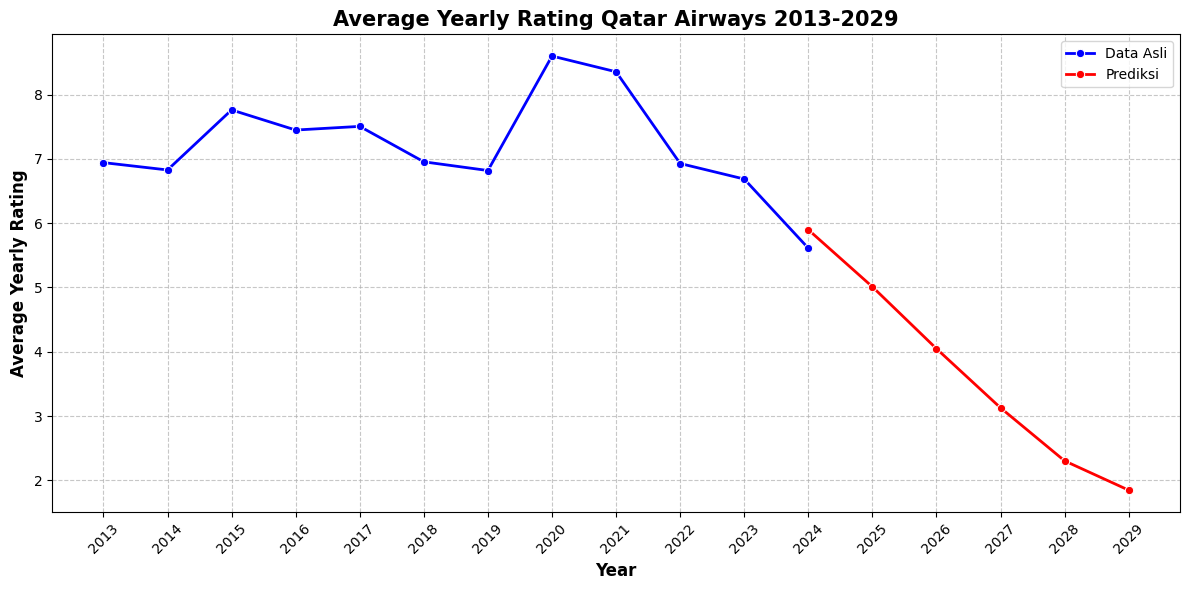

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Buat kolom 'Year' untuk memastikan setiap tahun muncul pada sumbu x
df_pred['Year'] = df_pred.index.year

# Pisahkan data asli dan prediksi
df_actual = df_pred.loc[df_pred.index <= df_monthly_for_modeling.index[-1]]
df_forecast = df_pred.loc[df_pred.index > df_monthly_for_modeling.index[-1]]

# Plot rata-rata rating tahunan
plt.figure(figsize=(12, 6))

# Plot data asli dengan warna biru
sns.lineplot(data=df_actual, x="Year", y="Rating", estimator=np.mean,
             ci=None, marker="o", linewidth=2, color="blue", label="Data Asli")

# Plot data prediksi dengan warna merah
sns.lineplot(data=df_forecast, x="Year", y="Rating", estimator=np.mean,
             ci=None, marker="o", linewidth=2, color="red", label="Prediksi")

# Tambahkan judul dan label
plt.title("Average Yearly Rating Qatar Airways 2013-2029", fontsize=15, fontweight="bold")
plt.ylabel("Average Yearly Rating", fontsize=12, fontweight="bold")
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.7)

# Menetapkan tahun pada sumbu x dari 2013 hingga 2029
plt.xticks(ticks=np.arange(2013, 2030, 1), rotation=45)

# Tambahkan legenda
plt.legend()

# Mengatur margin plot
plt.tight_layout()

# Tampilkan plot
plt.show()
